In [10]:
import numpy as np
import pandas as pd
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# matplotlib 기반의 그래프를 출력 시 한글 사용을 위한 설정

# system이 Mac이면,
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

# 음수를 사용하기 위함
plt.rcParams['axes.unicode_minus'] = False

In [11]:
# ./data/student.csv 파일 읽어오기
# 이름을 인덱스로 사용

data = pd.read_csv('./data/student.csv', encoding='ms949', index_col=['이름'])

# 위 데이터의 경우 단순한 표준화 작업만으로는 성적을 비교하는 것이 어려울 수 있음.
# 최댓값이나 최댓값-최솟값으로 나눈 데이터로는 비교하기가 어려움.
# 이런 경우 표준값이나 편차값을 구해서 비교하는 것이 좋다

<Axes: xlabel='이름'>

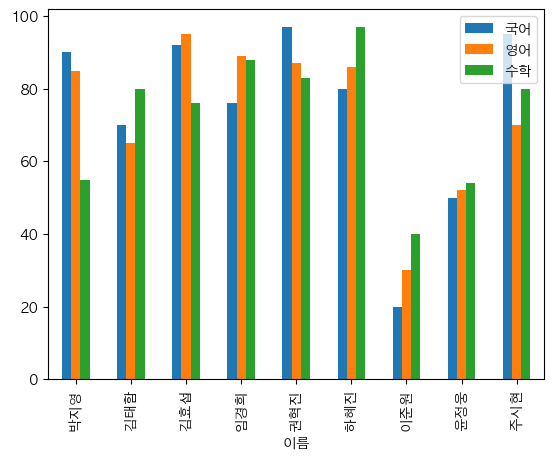

In [16]:
data.plot(kind='bar')

In [18]:
# 평균과 표준편차
kormean, korstd = data['국어'].mean(), data['국어'].std()
engmean, engstd = data['영어'].mean(), data['영어'].std()
matmean, matstd = data['수학'].mean(), data['수학'].std()

data['국어표준값']= (data['국어'] - kormean)/korstd
data['영어표준값']= (data['영어'] - engmean)/engstd
data['수학표준값']= (data['수학'] - matmean)/matstd

data['국어편차값'] = data['국어표준값']*10+50
data['영어편차값'] = data['영어표준값']*10+50
data['수학편차값'] = data['수학표준값']*10+50

data

,국어,영어,수학,국어표준값,영어표준값,수학표준값,국어편차값,영어편차값,수학편차값
이름,,,,,,,,,
박지영,90,85,55,0.616320,0.554321,-0.941716,56.163201,55.543208,40.582843
김태함,70,65,80,-0.176091,-0.386979,0.399335,48.239085,46.130213,53.993351
김효섭,92,95,76,0.695561,1.024971,0.184767,56.955613,60.249706,51.847670
임경희,76,89,88,0.061632,0.742581,0.828471,50.616320,57.425807,58.284714
권혁진,97,87,83,0.893664,0.648451,0.560261,58.936642,56.484508,55.602612
하혜진,80,86,97,0.220114,0.601386,1.311250,52.201143,56.013858,63.112497
이준원,20,30,40,-2.157120,-2.034253,-1.746346,28.428796,29.657471,32.536538
윤정웅,50,52,54,-0.968503,-0.998823,-0.995358,40.314970,40.011766,40.046423
주시현,95,70,80,0.814423,-0.151654,0.399335,58.144230,48.483462,53.993351


In [20]:
auto_mpg = pd.read_csv('./data/auto-mpg.csv', header=None)
auto_mpg.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

auto_mpg['horsepower'].replace('?', np.nan, inplace=True)
auto_mpg.dropna(subset=['horsepower'], axis=0, inplace=True)
auto_mpg['horsepower'] = auto_mpg['horsepower'].astype('float')
print(auto_mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                       name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [21]:
# horsepower 열의 표준화
auto_mpg['max_horsepower'] = auto_mpg['horsepower'] / auto_mpg['horsepower'].max()
auto_mpg['minmax_horsepower'] = (auto_mpg['horsepower'] - auto_mpg['horsepower'].min()) / (auto_mpg['horsepower'].max() - auto_mpg['horsepower'])

auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,max_horsepower,minmax_horsepower
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.454215,inf
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.167353,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.200000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.326087,0.187097
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.406522,0.348003
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.547826,0.769731
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,inf
